# Semisynthetic data experiments

This notebook contains the analysis of the results of the semisynthetic experiments performed for the paper.

It has been modified slightly from the original notebook: absolute paths have been anonymized, and some additional explanatory comments have been added.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy import stats

In [8]:
# Helper function for extracting the results from the output of semisynthetic_sweeps.py
def extract(dat, ke, t='eval'):
    x = []
    for i in range(len(dat)):
        x.append([])
        for j in range(len(dat[i])):
            x[i].append([])
            for k in range(len(dat[i][j])):
                x[i][j].append([])
                if ke in dat[i][j][k][t]:
                    x[i][j][k] = dat[i][j][k][t][ke]
                else:
                    x[i][j][k] = np.nan * np.ones(len(dat[i][j][k][t]))
    return np.array(x)

# Model class comparison

#### Analysis of the results of sweep_class.sh
Here, PATH_TO_OUTPUT is the path to the output of running this script (it is a folder produced by aim, with the format '{random-words}-{random-hash}') 

In [42]:
result_file = 'PATH_TO_OUTPUT/sweep_results.pkl'
with open(result_file, 'rb') as f:
    data = pickle.load(f)

In [47]:
pr_auc = extract(data, 'causal_noncausal_pr_auc_test_mn').squeeze(0)
categories = ['CAIRE', 'uncorrected', 'Attention CAIRE', f'DeepRC$^\star$', 'No propensity CAIRE']

# Average and standard error of the PR AUC, for discriminating causal sequences from all others.
pr_auc_mn = pr_auc.mean(axis=0)
pr_auc_se = pr_auc.std(axis=0) / np.sqrt(pr_auc.shape[0])

In [44]:
pr_auc_mn

array([0.85871542, 0.56260779, 0.8157397 , 0.55263973, 0.91870303])

In [45]:
pr_auc_se

array([0.04190439, 0.02041811, 0.04489918, 0.02829508, 0.03492202])

In [35]:
# Testing for differences in performance between the models.
for j in range(1, len(categories)):
    print(categories[0], 'vs', categories[j])
    print(stats.ttest_ind(pr_auc[:, 0], pr_auc[:, j], permutations=10000))

proposed vs baseline
TtestResult(statistic=6.136918581830233, pvalue=9.999000099990002e-05, df=nan)
proposed vs w/attention
TtestResult(statistic=0.6760216649816798, pvalue=0.5155484451554845, df=nan)
proposed vs DeepRC*
TtestResult(statistic=5.848125812686346, pvalue=9.999000099990002e-05, df=nan)
proposed vs w/o propensity
TtestResult(statistic=-1.0624245424023375, pvalue=0.30026997300269975, df=nan)


Text(0.5, 1.0, 'Causal vs. Noncausal Sequences')

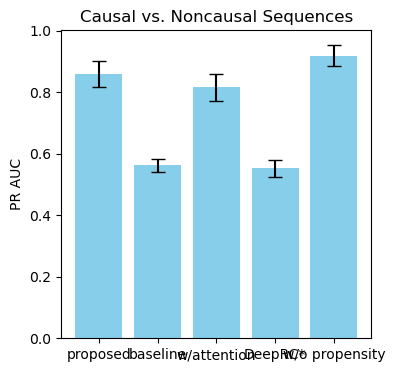

In [10]:
plt.figure(figsize=(4, 4))
plt.bar(categories, pr_auc_mn, yerr=pr_auc_se, capsize=5, color='skyblue')
plt.ylabel('PR AUC')
plt.title('Causal vs. Noncausal Sequences')

In [20]:
auc = extract(data, 'causal_confounder_auc_test_mn').squeeze(0)
categories = ['proposed', 'baseline', 'w/attention', 'DeepRC*', 'w/o propensity']

# Average and standard error of the AUC, for discriminating causal from confounded sequences.
auc_mn = auc.mean(axis=0)
auc_se = auc.std(axis=0) / np.sqrt(auc.shape[0])

Text(0.5, 1.0, 'Causal vs. Confounded Sequences')

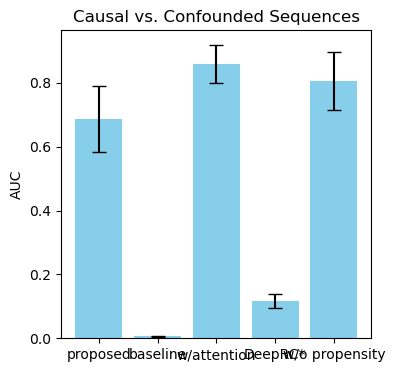

In [21]:
plt.figure(figsize=(4, 4))
plt.bar(categories, auc_mn, yerr=auc_se, capsize=5, color='skyblue')
plt.ylabel('AUC')
plt.title('Causal vs. Confounded Sequences')

# Injection rate comparison

#### Analysis of the results of sweep_inject_rate.sh
Here, PATH_TO_OUTPUT is the path to the output of running this script (it is a folder produced by aim, with the format '{random-words}-{random-hash}') 

In [52]:
result_file = 'PATH_TO_OUTPUT/sweep_results.pkl'
with open(result_file, 'rb') as f:
    data = pickle.load(f)


In [53]:
pr_auc = extract(data, 'causal_noncausal_pr_auc_test_mn')
categories = ['CAIRE', 'uncorrected']

# Reorder.
pr_auc = np.concatenate([pr_auc[2, None, :, :], pr_auc[:2, :, :]], axis=0)
inject_rate = [0.01, 0.005, 0.001]

pr_auc_mn = pr_auc.mean(axis=1)
pr_auc_se = pr_auc.std(axis=1) / np.sqrt(pr_auc.shape[1])


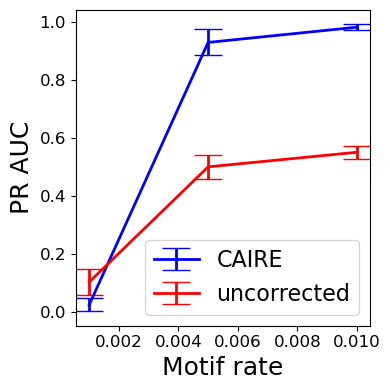

In [56]:
plt.figure(figsize=(4, 4))
plt.errorbar(inject_rate, pr_auc_mn[:, 0], pr_auc_se[:, 0], label=categories[0], capsize=10,
            color='blue', linewidth=2)
plt.errorbar(inject_rate, pr_auc_mn[:, 1], pr_auc_se[:, 1], label=categories[1], capsize=10,
            color='red', linewidth=2)
plt.xlabel('Motif rate', fontsize=18)
plt.ylabel('PR AUC', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.tight_layout()
plt.savefig('saved_figs/semisynthetic_inject_rate.pdf')

In [40]:
for j in range(len(inject_rate)):
    print(inject_rate[j])
    print(stats.ttest_ind(pr_auc[j, :, 0], pr_auc[j, :, 1], permutations=10000))

0.01
TtestResult(statistic=17.000076830184195, pvalue=9.999000099990002e-05, df=nan)
0.005
TtestResult(statistic=6.738551568326784, pvalue=9.999000099990002e-05, df=nan)
0.001
TtestResult(statistic=-1.456636565588004, pvalue=0.11798820117988201, df=nan)


# No confounding

#### Analysis of the results of sweep_strength.sh
Here, PATH_TO_OUTPUT is the path to the output of running this script (it is a folder produced by aim, with the format '{random-words}-{random-hash}') 

In [57]:
result_file = 'PATH_TO_OUTPUT/sweep_results.pkl'
with open(result_file, 'rb') as f:
    data = pickle.load(f)

In [58]:
pr_auc = extract(data, 'causal_noncausal_pr_auc_test_mn').squeeze(0)
categories = ['proposed', 'baseline']

# Average and standard error of the PR AUC, for discriminating causal sequences from all others.
pr_auc_mn = pr_auc.mean(axis=0)
pr_auc_se = pr_auc.std(axis=0) / np.sqrt(pr_auc.shape[0])

In [59]:
pr_auc_mn

array([0.99948612, 0.99883701])

In [60]:
pr_auc_se

array([0.00013306, 0.00054258])